In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_bank = pd.read_csv('Customer-Churn-Records.csv')
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Limpeza de dados

Nessa etapa vamos fazer a limpeza de dados, onde veremos se há valores ausentes no dataframe e exibir
a porcentagem de valores ausentes em cada coluna, em seguida (caso haja), vamos preencher os valores
ausentes, checar novamente se ainda há algum valor ausente e em seguida eliminar as duplciatas.

In [ ]:
# 1. Verificar valores ausentes em cada coluna
print("Quantidade de valores ausentes em cada coluna:")
print(df_bank.isnull().sum())

# 2. Verificar a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes em cada coluna:")
print(df_bank.isnull().mean() * 100)

# 3. Verificar os tipos das colunas
print("\nTipos das colunas:")
print(df_bank.dtypes)

# Separar as colunas numéricas e categóricas
numerical_cols = df_bank.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_bank.select_dtypes(include=['object']).columns

# 5. Verificar duplicatas no dataframe
print("\nQuantidade de duplicatas:")
print(df_bank.duplicated().sum())

# 6. Remover duplicatas, se houver
df_bank = df_bank.drop_duplicates()

# 7. Verificar o número de duplicatas após remoção
print("\nQuantidade de duplicatas após remoção:")
print(df_bank.duplicated().sum())

Quantidade de valores ausentes em cada coluna:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Porcentagem de valores ausentes em cada coluna:
RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned     

# Análise Exploratória de Dados (EDA)

Nessa etapa descreveremos estatísticas gerais, utilizando df.describe() para insights iniciais.
Plotaremos distribuições de variáveis usando sns.histplot() e sns.boxplot() para visualizar variáveis
numéricas.

In [ ]:
# Estatísticas descritivas para variáveis numéricas
df_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


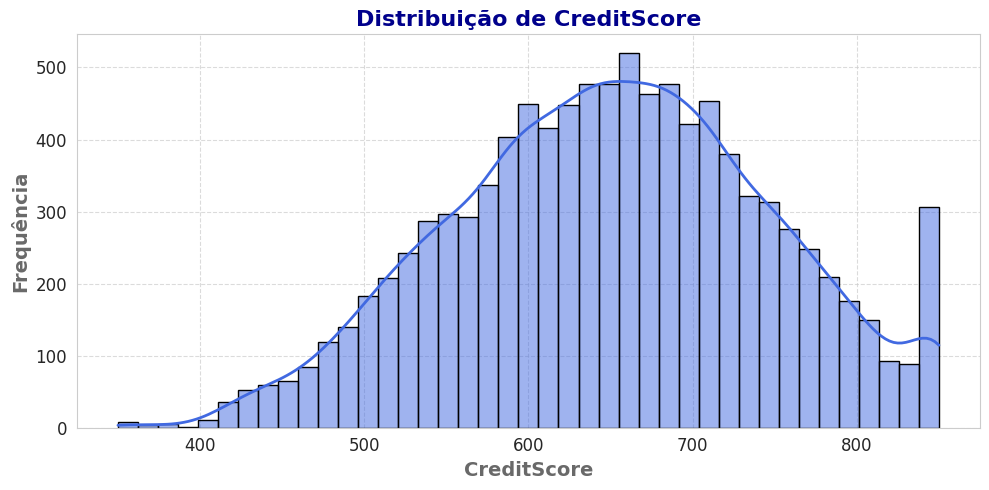

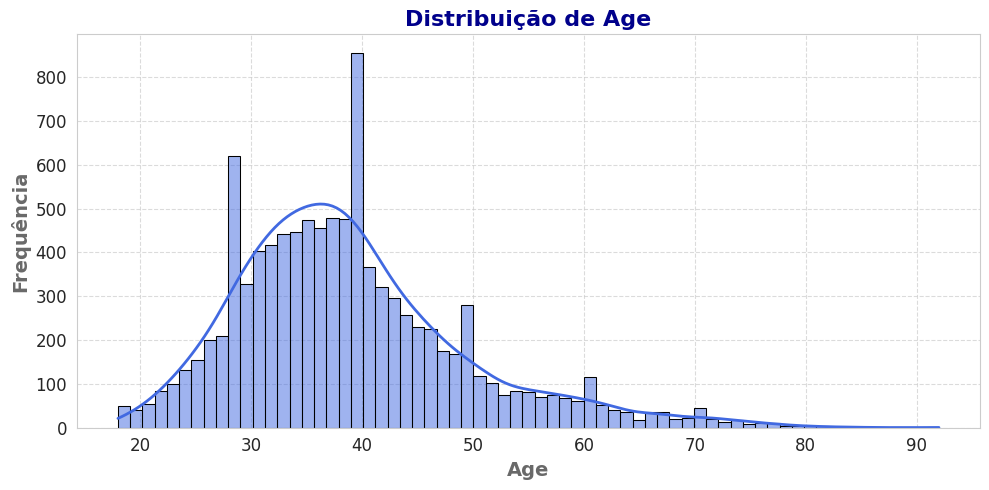

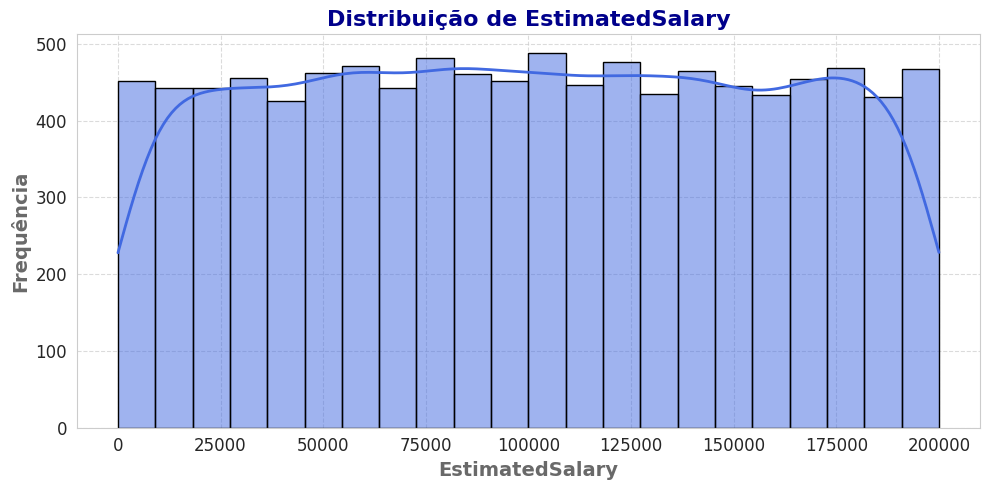

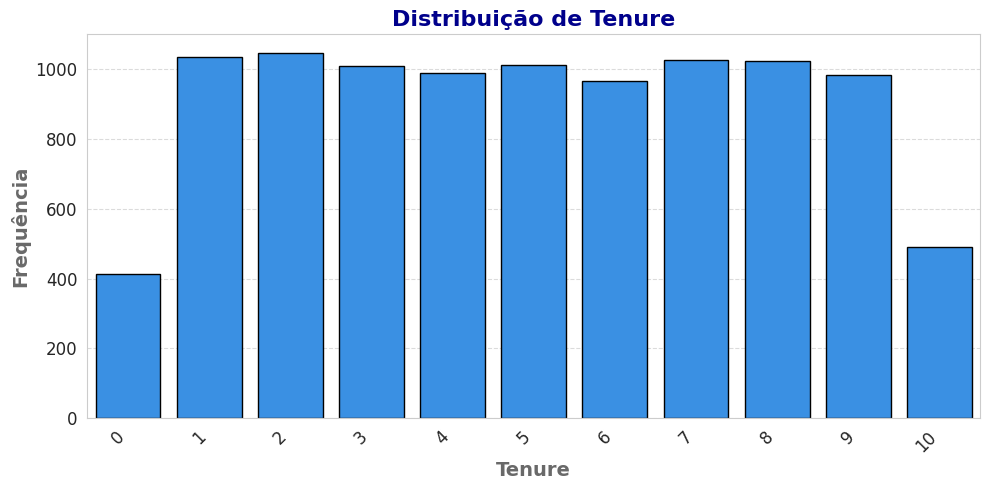

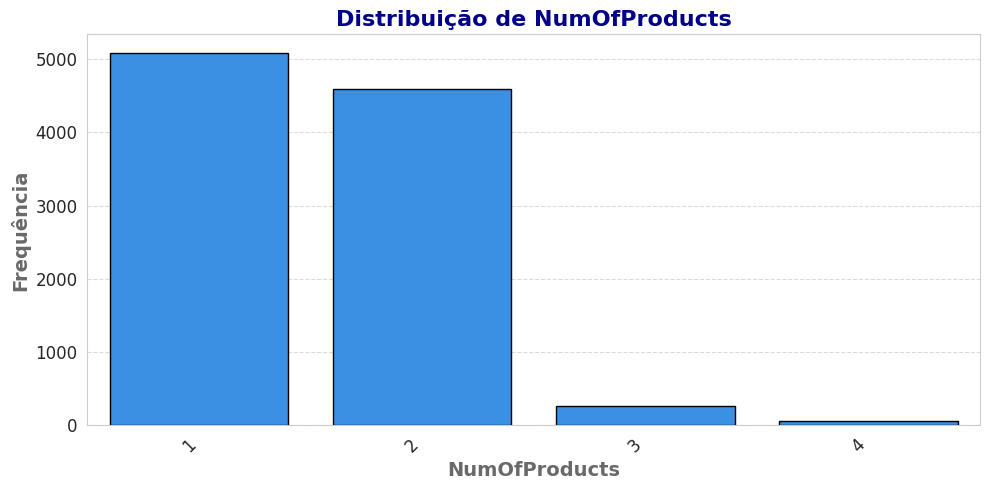

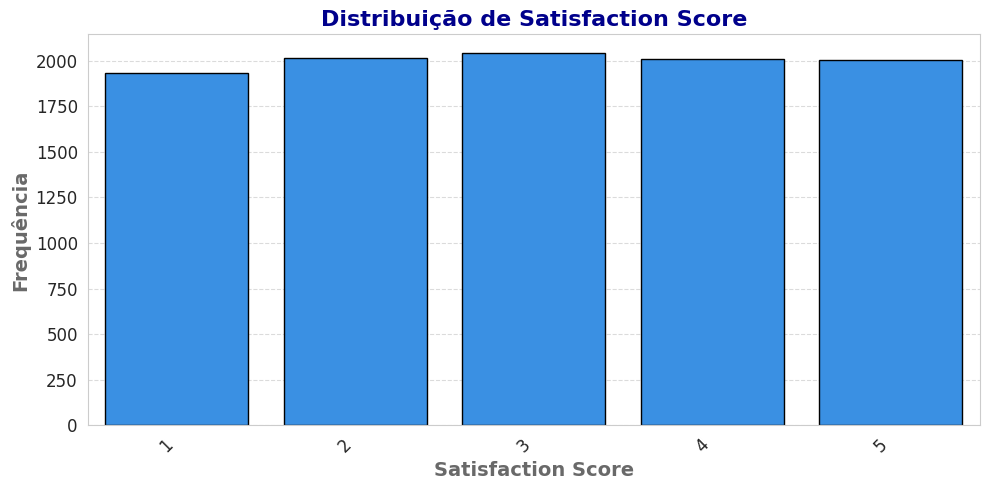

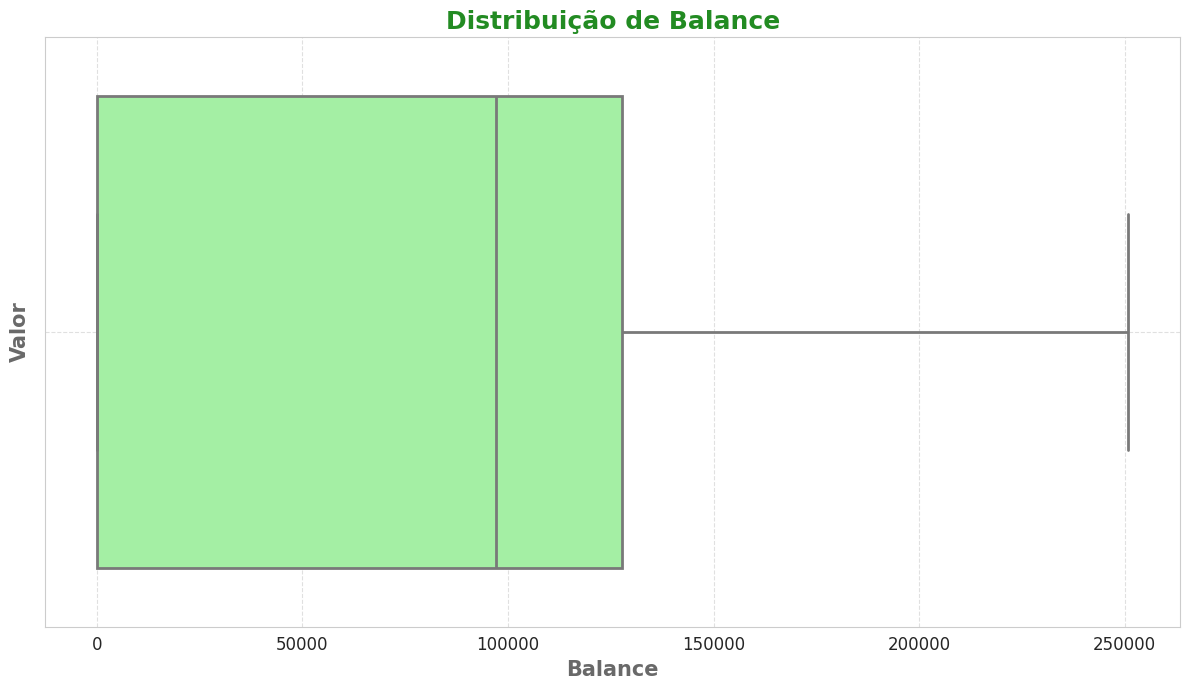

In [ ]:
# Criando uma listas com as colunas numéricas
colunas_numericas1 = [
    'CreditScore', 'Age', 'EstimatedSalary',
]

colunas_numericas2 = [
    'Tenure', 'NumOfProducts', 'Satisfaction Score'
]

# Configuração de estilo geral para todos os gráficos
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlecolor': 'darkblue',
    'axes.labelcolor': 'dimgray'
})

# Plotando cada variável da lista 1
for coluna in colunas_numericas1:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_bank[coluna], kde=True, color='royalblue', edgecolor="black", line_kws={'linewidth': 2})
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotando cada variável da lista 2
for coluna in colunas_numericas2:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_bank[coluna], color='dodgerblue', edgecolor="black")
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotando a variável Balance
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_bank['Balance'], color='palegreen', linewidth=2, fliersize=3, whis=1.5)
plt.title('Distribuição de Balance', fontsize=18, weight='bold', color='forestgreen')
plt.xlabel('Balance', fontsize=15, weight='bold', color='dimgray')
plt.ylabel('Valor', fontsize=15, weight='bold', color='dimgray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualizações de Variáveis Categóricas

Nessa etapa analisaremos algumas variáveis usando o gráficos de barras para observar padrões.
Estudaremos o impacto de variáveis como Card Type e HasCrCard, ou Gender e Geography para
verificar como influenciam o churn.

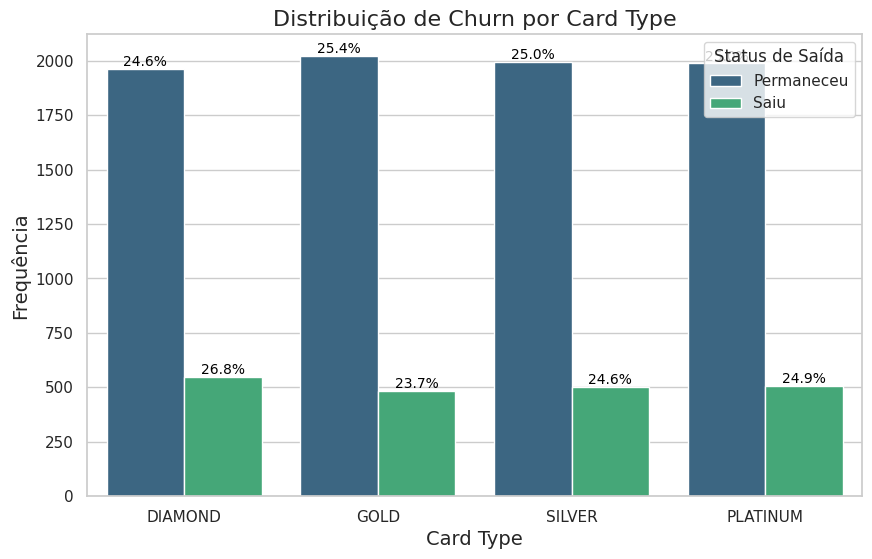

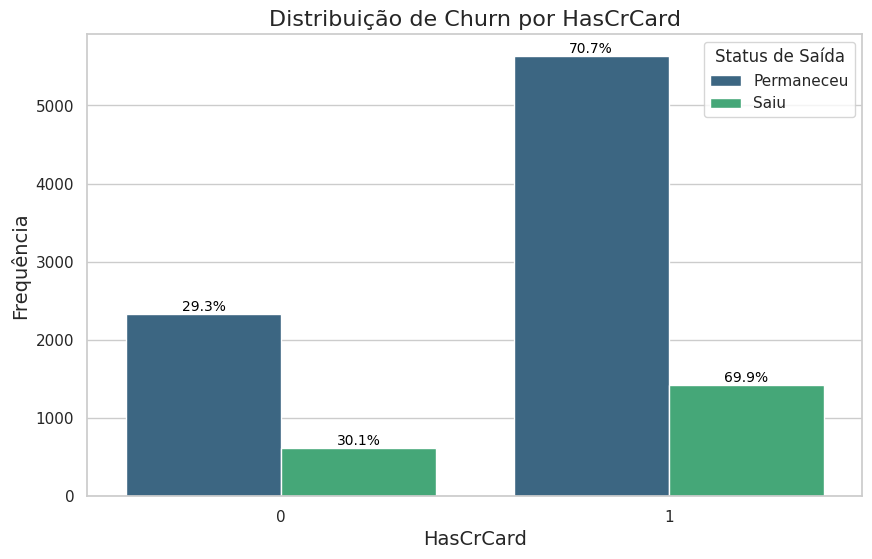

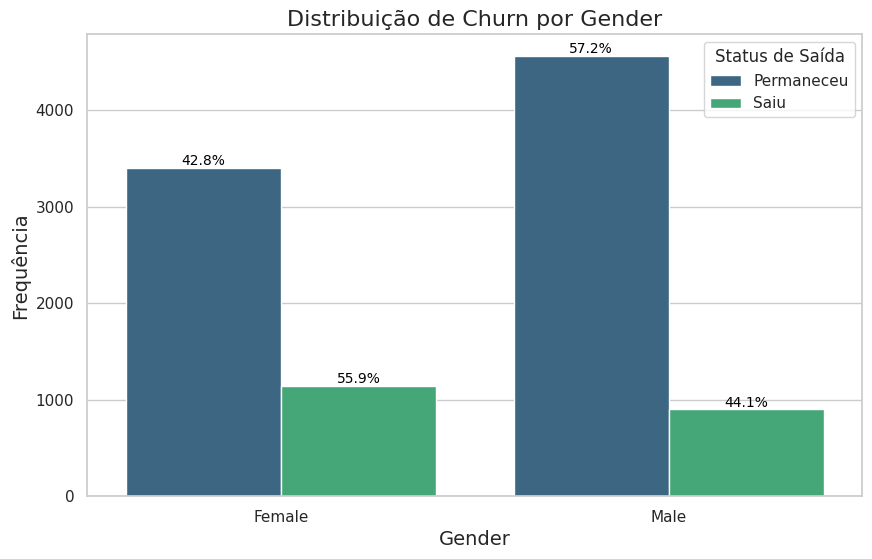

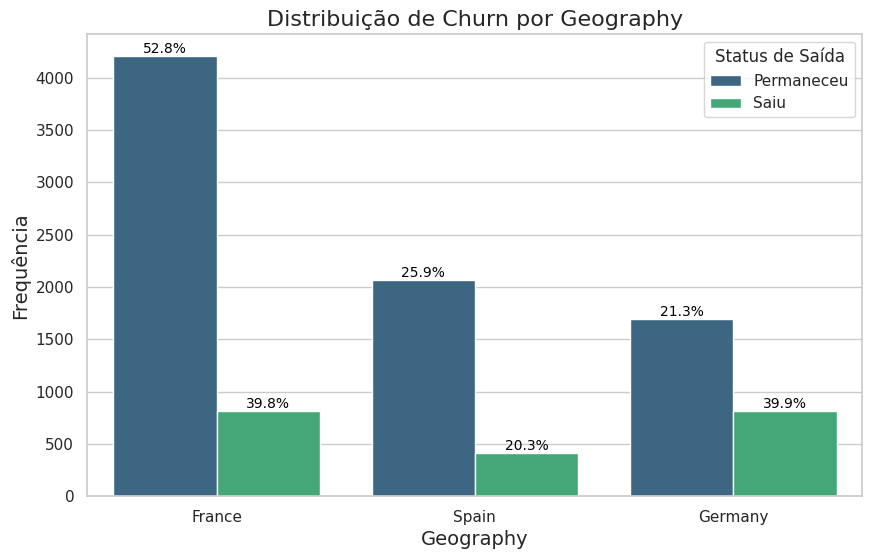

In [ ]:

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})

# Loop para gráficos Card Type e HasCrCard
for coluna in ['Card Type', 'HasCrCard']:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df_bank[coluna], hue=df_bank['Exited'], palette="viridis", dodge=True)

    for container in ax.containers:
        total = sum([p.get_height() for p in container])  # Total de cada grupo
        for p in container:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Distribuição de Churn por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend(title='Status de Saída', loc='upper right', labels=['Permaneceu', 'Saiu'])
    plt.show()

for coluna in ['Gender', 'Geography']:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df_bank[coluna], hue=df_bank['Exited'], palette="viridis", dodge=True)

    for container in ax.containers:
        total = sum([p.get_height() for p in container])  # Total de cada grupo
        for p in container:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Distribuição de Churn por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend(title='Status de Saída', loc='upper right', labels=['Permaneceu', 'Saiu'])
    plt.show()

# Análise de Correlação

Nessa etapa calcularemos a matriz de correlação usando df.corr() e visualizaremos com sns.heatmap().
Também identificaremos variáveis fortemente correlacionadas destacando variáveis que podem afetar o
churn.

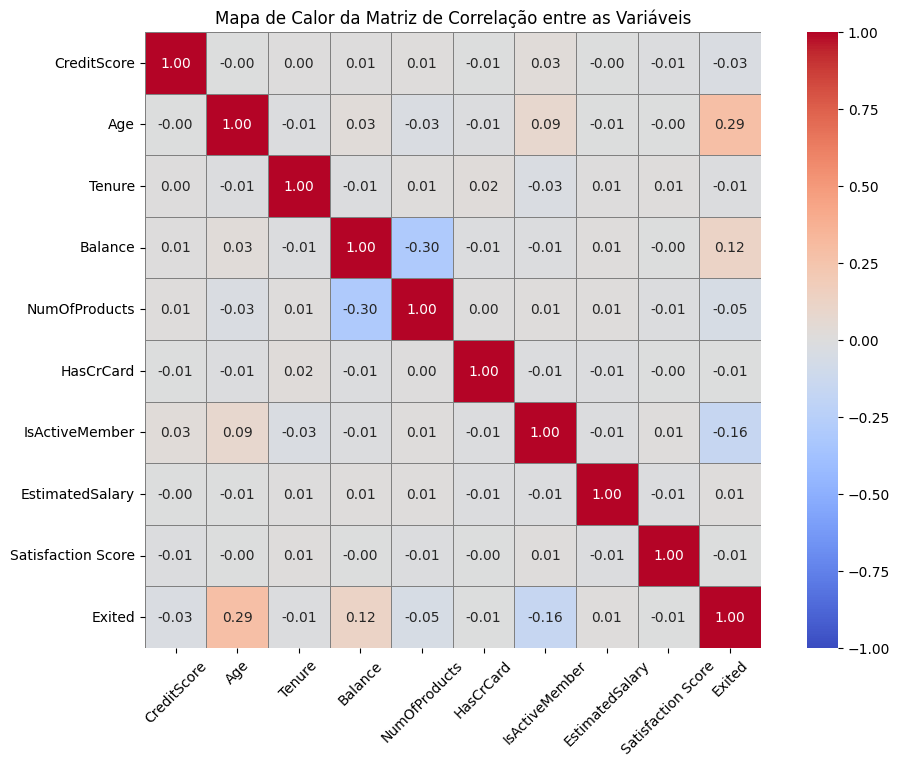

In [ ]:
#Criando lista com as variáveis numéricas
colunas_numericas = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Exited'
]

matriz_correlacao = df_bank[colunas_numericas].corr()

plt.figure(figsize=(12, 8))

# Criando o mapa de calor
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True,
            linewidths=0.5, linecolor='gray', vmin=-1, vmax=1)

plt.title('Mapa de Calor da Matriz de Correlação entre as Variáveis')
plt.xticks(rotation=45)
plt.show()


# Análise Bivariada

Nessa etapa vamos comparar variáveis com Exited usando sns.countplot() para visualizar a distribuição e sns.violinplot(), sns.kdeplot ou sns.boxplot() para analisar a densidade/Frequência em
valores diferentes, assim comparando os grupos.
Exploraremos combinações como Age e Tenure para entender como afetam a decisão de saída

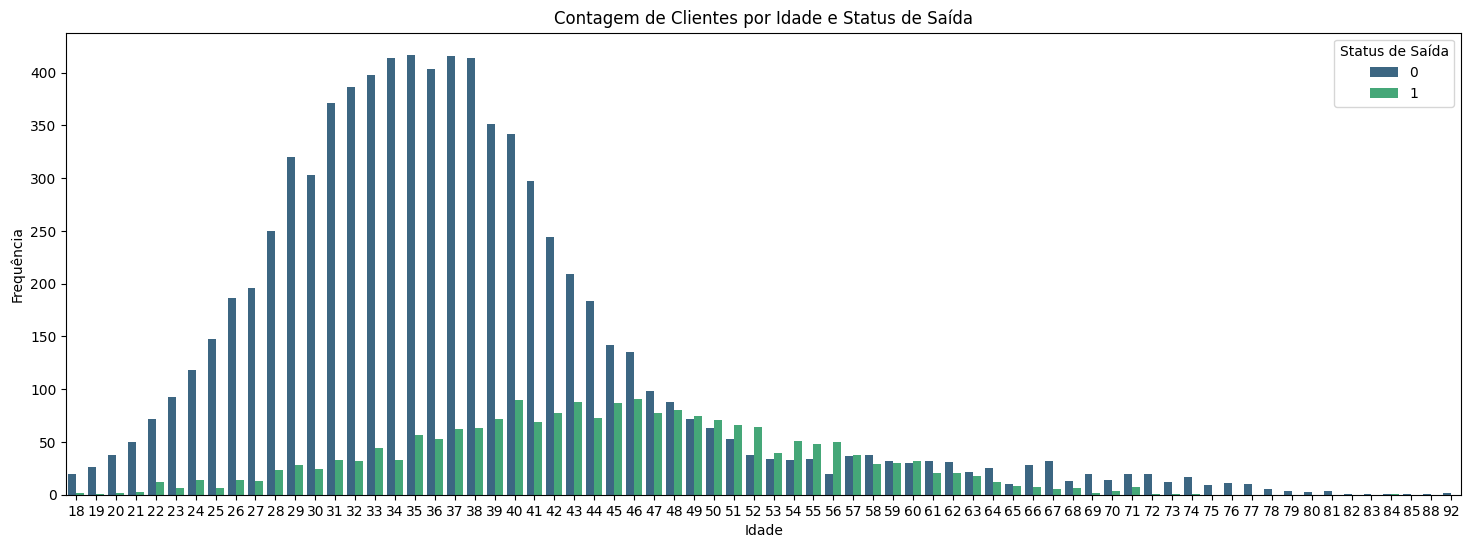

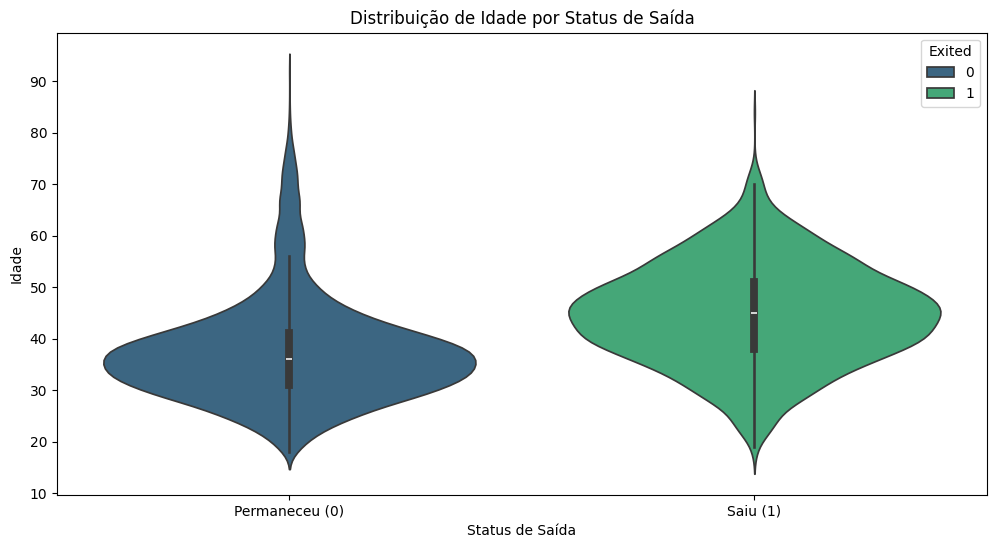

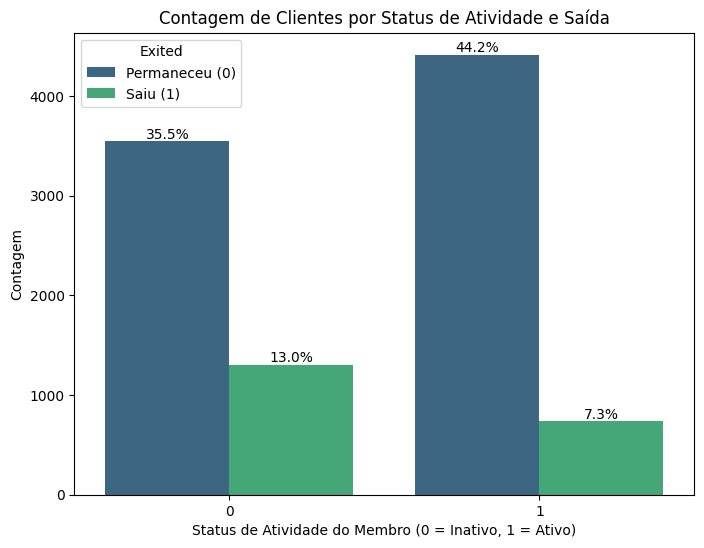

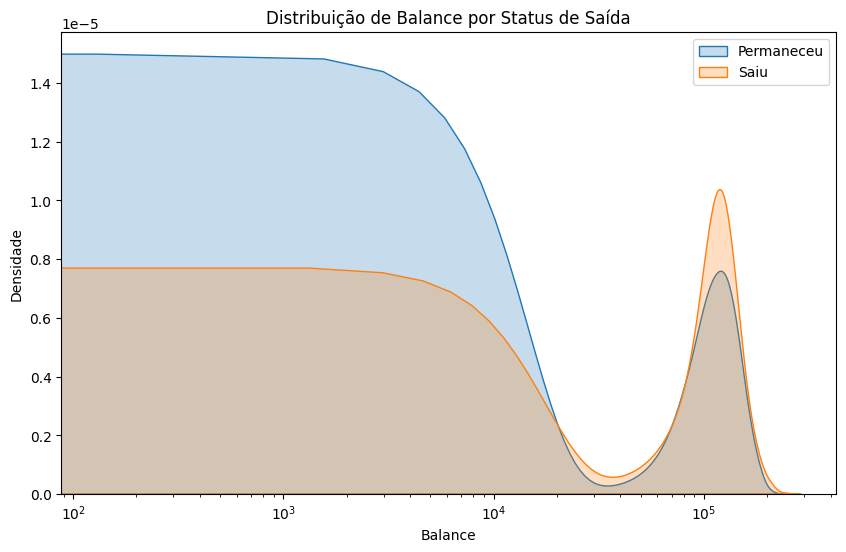

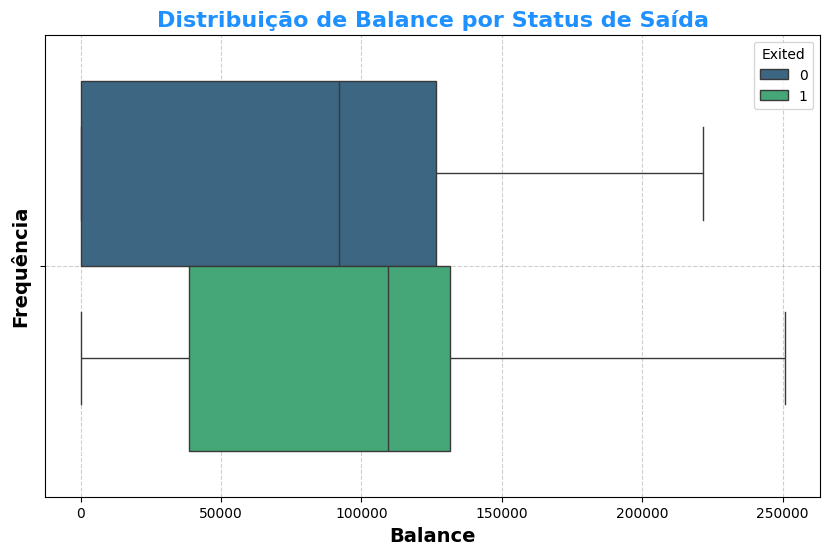

In [ ]:
#Plotando a distribuição de clientes por idade e status de saída
plt.figure(figsize=(18, 6))
sns.countplot(data=df_bank, x='Age', hue='Exited', palette='viridis', dodge=True)
plt.title('Contagem de Clientes por Idade e Status de Saída')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Status de Saída', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#Agora utilizamos o violinplot para visualizar a densidade em valores diferentes
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_bank, x='Exited', y='Age', hue='Exited', palette='viridis')
plt.title('Distribuição de Idade por Status de Saída')
plt.xlabel('Status de Saída')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Permaneceu (0)', 'Saiu (1)'])
plt.show()

# Criar o gráfico de contagem
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_bank, x='IsActiveMember', hue='Exited', palette='viridis')

# Título e rótulos
plt.title('Contagem de Clientes por Status de Atividade e Saída')
plt.xlabel('Status de Atividade do Membro (0 = Inativo, 1 = Ativo)')
plt.ylabel('Contagem')
plt.legend(title='Exited', labels=['Permaneceu (0)', 'Saiu (1)'])

# Adicionar porcentagens no topo das barras
total = len(df_bank)  # Contagem total de registros
for p in ax.patches:
      height = p.get_height()
      if height > 0:
        percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

#Plotando a Distribuição de balance por status de saída
plt.figure(figsize=(10, 6))
sns.kdeplot(df_bank.loc[df_bank['Exited'] == 0, 'Balance'], label='Permaneceu', fill=True)
sns.kdeplot(df_bank.loc[df_bank['Exited'] == 1, 'Balance'], label='Saiu', fill=True)
plt.xscale('log')  #Escalamento logaritmíco para melhor leitura
plt.title('Distribuição de Balance por Status de Saída')
plt.xlabel('Balance')
plt.ylabel('Densidade')
plt.legend()
plt.show()

#Agora utilizamos o boxplot para visualizar a densidade em valores diferentes
plt.figure(figsize=(10,6))
sns.boxplot(x=df_bank['Balance'], hue=df_bank['Exited'], palette='viridis')
plt.title('Distribuição de Balance por Status de Saída', fontsize=16, weight='bold', color='dodgerblue')
plt.xlabel('Balance', fontsize=14, weight='bold', color='black')
plt.ylabel('Frequência', fontsize=14, weight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Preparação dos Dados para Modelagem

Transformaremos as variáveis categóricas usando pd.get_dummies() para codificação.
Iremos escalonar as variáveis numéricas usando o StandardScaler para uniformizar as escalas

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Separando colunas numéricas das colunas categóricas
categorical_cols = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'IsActiveMember']
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score']

# 2. Applicar pd.get_dummies() para as colunas categóricas
df_encoded = pd.get_dummies(df_bank, columns=categorical_cols, drop_first=True)  # drop_first=True para evitar multicolinearidade

# 3. Uniformizar as colunas numéricas usando o StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Agora df_encoded está pronto para modelagem
print(df_encoded.head())


   RowNumber  CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
0          1    15634602  Hargrave    -0.326221  0.293517 -1.041760 -1.225848   
1          2    15647311      Hill    -0.440036  0.198164 -1.387538  0.117350   
2          3    15619304      Onio    -1.536794  0.293517  1.032908  1.333053   
3          4    15701354      Boni     0.501521  0.007457 -1.387538 -1.225848   
4          5    15737888  Mitchell     2.063884  0.388871 -1.041760  0.785728   

   NumOfProducts  EstimatedSalary  Exited  ...  Satisfaction Score  \
0      -0.911583         0.021886       1  ...           -0.721130   
1      -0.911583         0.216534       0  ...           -0.009816   
2       2.527057         0.240687       1  ...           -0.009816   
3       0.807737        -0.108918       0  ...            1.412812   
4      -0.911583        -0.365276       0  ...            1.412812   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464         

Tamanho do conjunto de treino: (8000, 17)
Tamanho do conjunto de teste: (2000, 17)


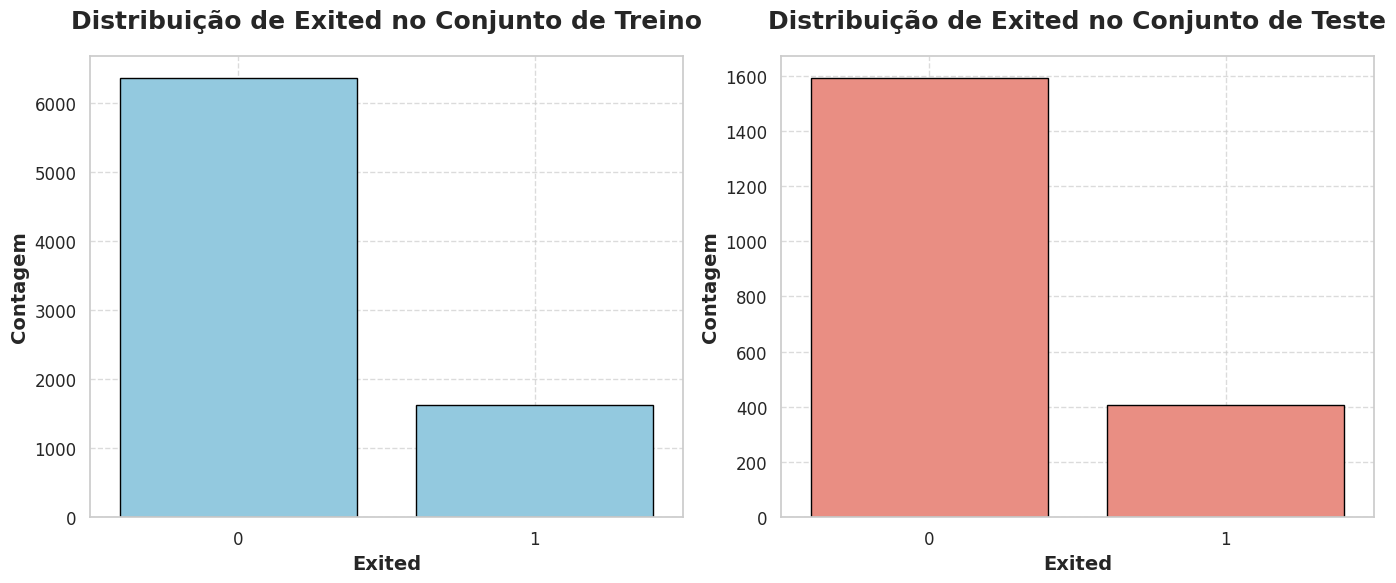

In [ ]:
from sklearn.model_selection import train_test_split

# Separar as features e o alvo
X = df_bank.drop('Exited', axis=1)  # Excluir a coluna 'Exited' das features
y = df_bank['Exited']  # Definir 'Exited' como variável alvo

# Dividir em conjunto de treino e teste (80% treino e 20% teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({'axes.titlesize': 16, 'axes.titleweight': 'bold', 'axes.labelsize': 14, 'axes.labelweight': 'bold'})

# Contagem da variável alvo em cada conjunto
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Conjunto de treino
sns.countplot(x=y_train, color='skyblue', ax=ax[0], edgecolor="black")
ax[0].set_title('Distribuição de Exited no Conjunto de Treino', fontsize=18, weight='bold')
ax[0].set_xlabel('Exited', fontsize=14, weight='bold')
ax[0].set_ylabel('Contagem', fontsize=14, weight='bold')
ax[0].tick_params(axis='x', labelsize=12, rotation=0)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Conjunto de teste
sns.countplot(x=y_test, color='salmon', ax=ax[1], edgecolor="black")
ax[1].set_title('Distribuição de Exited no Conjunto de Teste', fontsize=18, weight='bold')
ax[1].set_xlabel('Exited', fontsize=14, weight='bold')
ax[1].set_ylabel('Contagem', fontsize=14, weight='bold')
ax[1].tick_params(axis='x', labelsize=12, rotation=0)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Inicializar os modelos com max_iter aumentado para a Regressão Logística
logistic_model = LogisticRegression(random_state=42, max_iter=500)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Lista de modelos para facilitar o treinamento
modelos = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}

# Dicionário para armazenar os resultados
resultados = {
    "Modelo": [],
    "Acurácia": [],
    "AUC": [],
    "Precisão": [],
    "Recall": [],
    "F1-Score": []
}

# Aplicar One-Hot Encoding e padronização aos dados
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Loop para treinar e avaliar cada modelo usando os dados escalonados
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)  # Treinamento do modelo
    y_pred = modelo.predict(X_test_scaled)  # Previsões

    # Cálculo das métricas
    resultados["Modelo"].append(nome)
    resultados["Acurácia"].append(accuracy_score(y_test, y_pred))
    resultados["AUC"].append(roc_auc_score(y_test, modelo.predict_proba(X_test_scaled)[:, 1]))
    resultados["Precisão"].append(precision_score(y_test, y_pred, zero_division=0))
    resultados["Recall"].append(recall_score(y_test, y_pred))
    resultados["F1-Score"].append(f1_score(y_test, y_pred))

# Mostrar resultados em um DataFrame
df_resultados = pd.DataFrame(resultados)
display(df_resultados)


,Modelo,Acurácia,AUC,Precisão,Recall,F1-Score
0,Logistic Regression,0.996,0.997672,0.995050,0.985294,0.990148
1,Random Forest,0.998,0.999846,0.995098,0.995098,0.995098
2,XGBoost,0.998,0.999883,0.995098,0.995098,0.995098


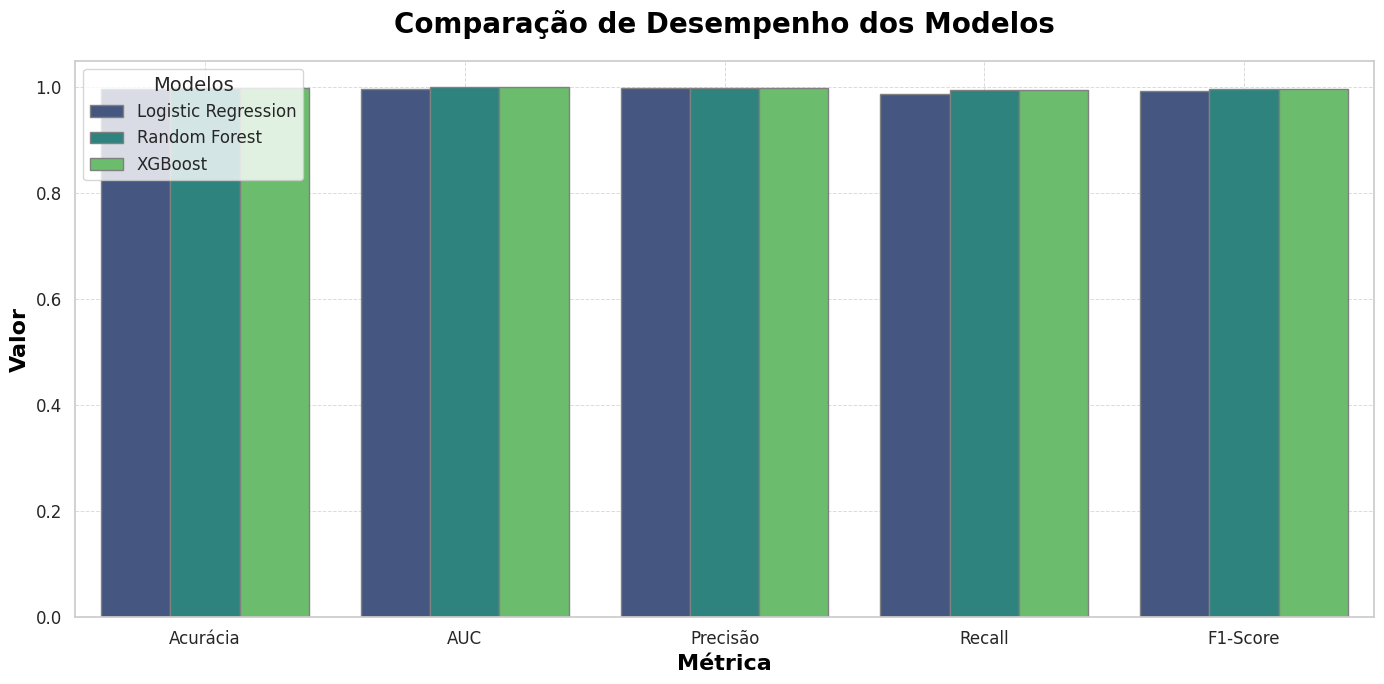

In [ ]:

sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'legend.title_fontsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlepad': 20
})

# Transformando os resultados para o formato longo para facilitar o gráfico
df_resultados_long = pd.melt(df_resultados, id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(14, 7))
sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_resultados_long, dodge=True, palette="viridis", edgecolor="gray")

# Customizando o gráfico
plt.title("Comparação de Desempenho dos Modelos", fontsize=20, weight='bold', color='black')
plt.xlabel("Métrica", fontsize=16, weight='bold', color='black')
plt.ylabel("Valor", fontsize=16, weight='bold', color='black')

# Ajuste de grid e fundo
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Melhorando a legenda
plt.legend(title="Modelos", loc='upper left', fontsize=12, title_fontsize=14)

# Exibindo o gráfico
plt.show()


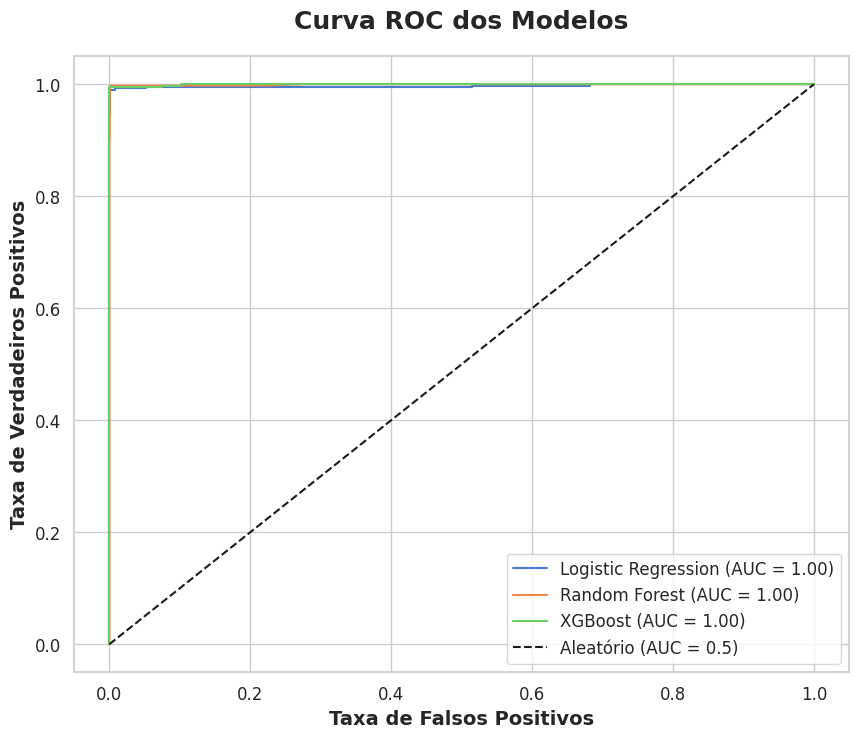

In [ ]:
plt.figure(figsize=(10, 8))
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)  # Treinamento
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]  # Prever probabilidades
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')

# Linha de referência
plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC dos Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Testar se vai dar overfitting ou algo similar